In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from torchsummary import summary

In [9]:
df = pd.read_csv("C:/Users/문도/Desktop/인지개 자료/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1



Genetic_pedigree_Coefficient : 가족력 유무
Pregnancy : 임신 여부
salt_content_in_the_diet : 식사 내 염분 수치량
Chronic_kidney_disease : 만성 질환 여부
Adrenal_and_thyroid_disorders : 갑상성 질환 여부

Text(0.5, 1.0, 'Blood_Pressure_Abnormality')

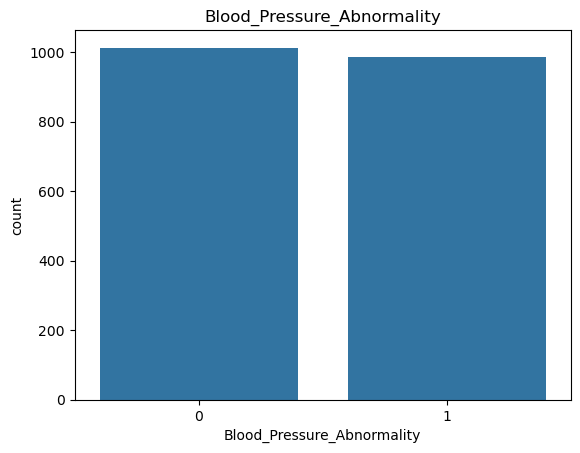

In [10]:
sns.countplot(data=df, x="Blood_Pressure_Abnormality")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("count")
plt.title("Blood_Pressure_Abnormality")

In [11]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [12]:
df.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [13]:
cols = ['Genetic_Pedigree_Coefficient', 'Pregnancy', 'alcohol_consumption_per_day']
df[cols] = df[cols].fillna(0)
df.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

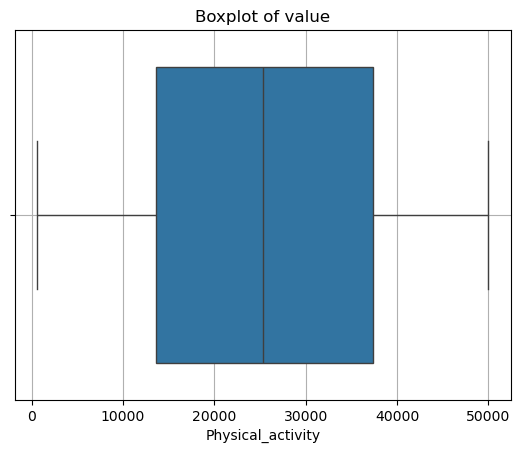

In [25]:
import seaborn as sns

sns.boxplot(x=df['Physical_activity'])  # 축 바꾸고 싶으면 y → x로
plt.title('Boxplot of value')
plt.grid(True)
plt.show()

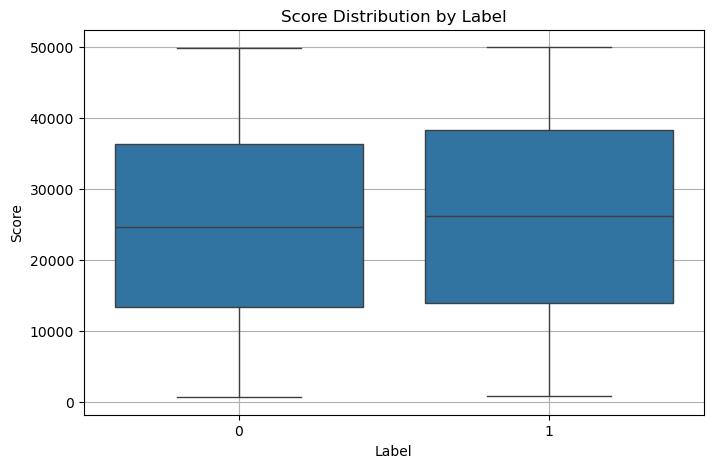

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Blood_Pressure_Abnormality'], y=df['Physical_activity'], data=df)
plt.title('Score Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Blood_Pressure_Abnormality')

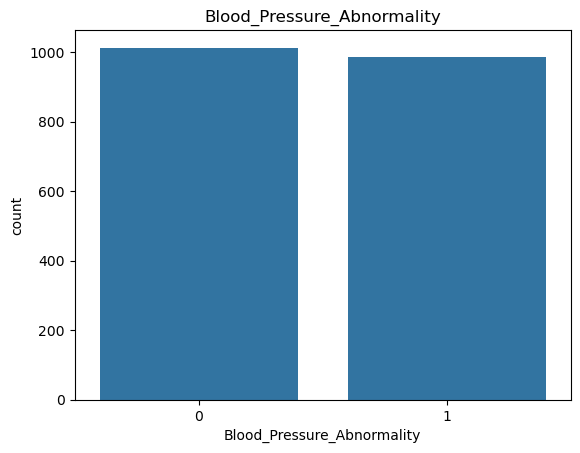

In [40]:
sns.countplot(data=df, x="Blood_Pressure_Abnormality")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("count")
plt.title("Blood_Pressure_Abnormality")

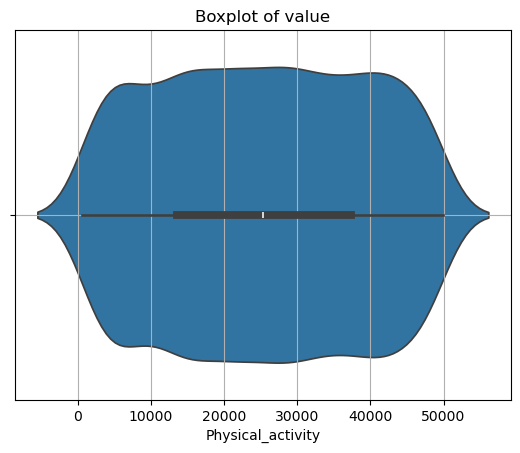

In [22]:
import seaborn as sns

sns.violinplot(x=df['Physical_activity'])  # 축 바꾸고 싶으면 y → x로
plt.title('violinplot of value')
plt.grid(True)
plt.show()

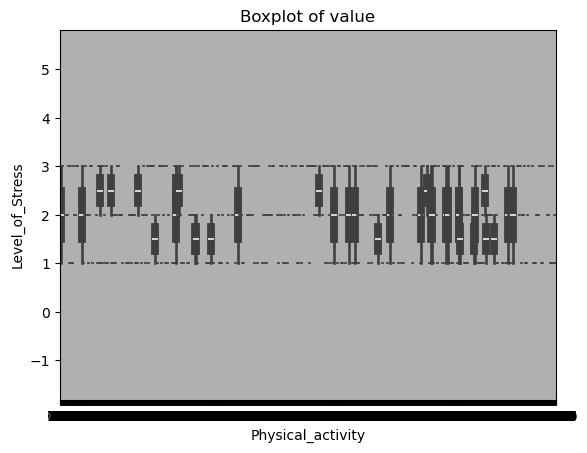

In [23]:
import seaborn as sns

sns.violinplot(x=df['Physical_activity'], y=df['Level_of_Stress'])  # 축 바꾸고 싶으면 y → x로
plt.title('violinplot of value')
plt.grid(True)
plt.show()

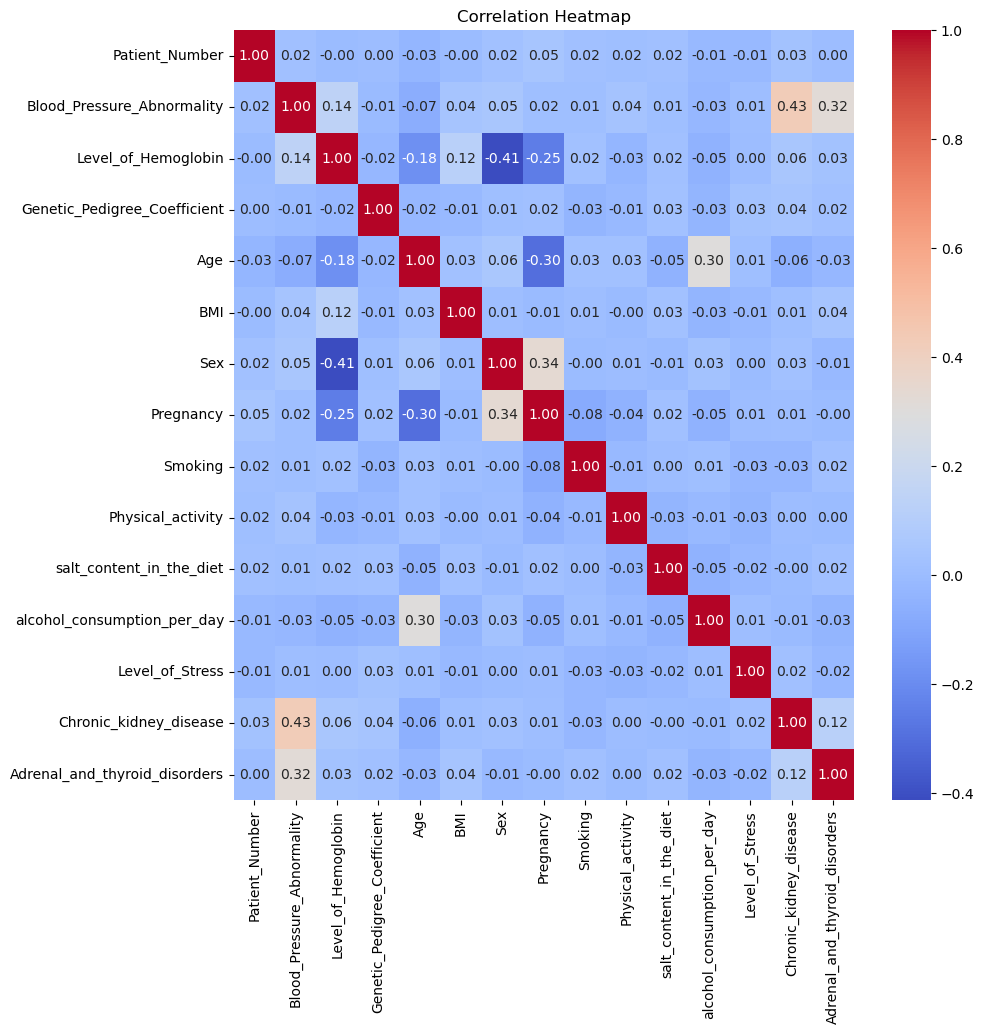

In [15]:
corr = df.corr()

# Heatmap 그리기
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

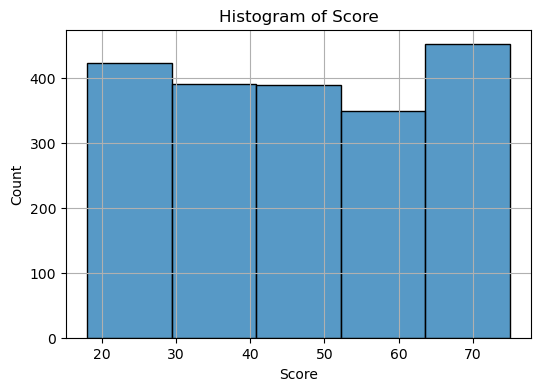

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=5, kde=False)
plt.title('Histogram of Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

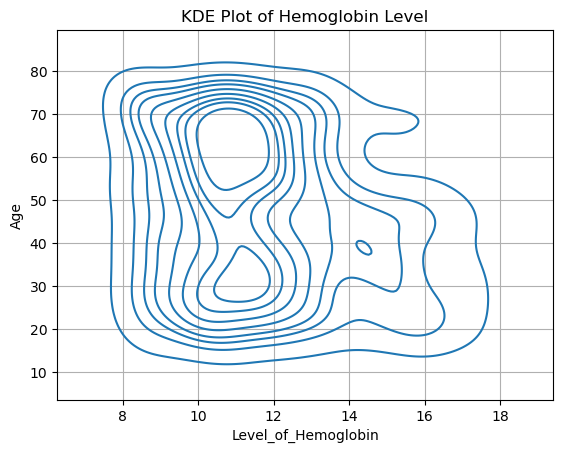

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: Level_of_Hemoglobin 컬럼의 KDE plot
sns.kdeplot(data=df, x='Level_of_Hemoglobin', y='Age')

plt.title('KDE Plot of Hemoglobin Level')
plt.grid(True)
plt.show()

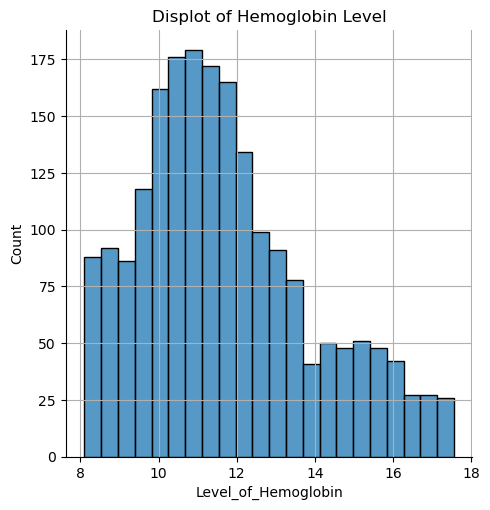

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: Level_of_Hemoglobin 컬럼으로 displot
sns.displot(data=df, x='Level_of_Hemoglobin')

plt.title('Displot of Hemoglobin Level')
plt.grid(True)
plt.show()

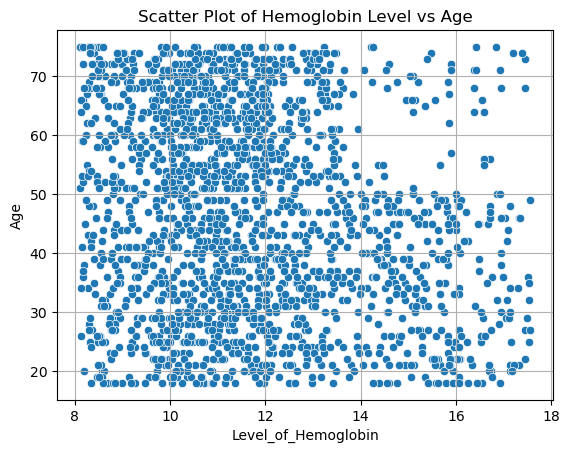

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: Hemoglobin 수치(Level_of_Hemoglobin) vs 나이(Age) 산점도
sns.scatterplot(data=df, x='Level_of_Hemoglobin', y='Age')

plt.title('Scatter Plot of Hemoglobin Level vs Age')
plt.grid(True)
plt.show()


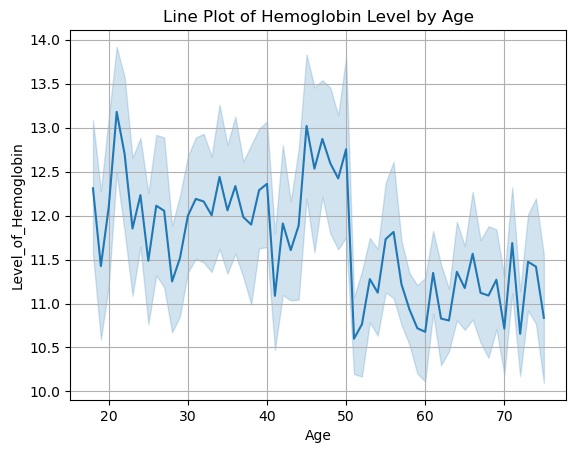

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: 나이(Age)에 따라 Hemoglobin 수치(Level_of_Hemoglobin) 변화 보기
sns.lineplot(data=df, x='Age', y='Level_of_Hemoglobin')

plt.title('Line Plot of Hemoglobin Level by Age')
plt.grid(True)
plt.show()

In [26]:
X = df.drop('Blood_Pressure_Abnormality', axis = 1).values
X

array([[1.000e+00, 1.128e+01, 9.000e-01, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [2.000e+00, 9.750e+00, 2.300e-01, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [3.000e+00, 1.079e+01, 9.100e-01, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.998e+03, 1.691e+01, 2.200e-01, ..., 2.000e+00, 1.000e+00,
        1.000e+00],
       [1.999e+03, 1.115e+01, 7.200e-01, ..., 3.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+03, 1.136e+01, 9.000e-02, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

In [27]:
y = df['Blood_Pressure_Abnormality'].values
y

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [28]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 14), (1600,), (400, 14), (400,))

In [30]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.int64)

In [31]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle = True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size = 64, shuffle = False)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([1600]),
 torch.Size([400, 14]),
 torch.Size([400]))

In [33]:
class BP_dateDense(nn.Module):
    def __init__(self):
        super(BP_dateDense, self).__init__()
        self.fc1 = nn.Linear(14, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)
        self.dropout = nn.Dropout(0.5)  # 50% 확률로 뉴런 제거

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # dropout after fc1
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)  # dropout again
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = BP_dateDense()

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = 1e-4)

In [35]:
train_losses = []
test_accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_losses.append(running_loss / len(train_dataloader))

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]: .4f}, Accuracy: {accuracy: .2f}%")

print("Training complete.")

Epoch 1/50, Loss:  0.6878, Accuracy:  61.00%
Epoch 2/50, Loss:  0.6394, Accuracy:  72.75%
Epoch 3/50, Loss:  0.5826, Accuracy:  73.50%
Epoch 4/50, Loss:  0.5628, Accuracy:  73.00%
Epoch 5/50, Loss:  0.5448, Accuracy:  73.00%
Epoch 6/50, Loss:  0.5443, Accuracy:  73.75%
Epoch 7/50, Loss:  0.5246, Accuracy:  76.25%
Epoch 8/50, Loss:  0.5328, Accuracy:  75.75%
Epoch 9/50, Loss:  0.5217, Accuracy:  76.50%
Epoch 10/50, Loss:  0.5088, Accuracy:  76.25%
Epoch 11/50, Loss:  0.5011, Accuracy:  75.50%
Epoch 12/50, Loss:  0.4962, Accuracy:  76.50%
Epoch 13/50, Loss:  0.4915, Accuracy:  79.00%
Epoch 14/50, Loss:  0.4855, Accuracy:  76.50%
Epoch 15/50, Loss:  0.4651, Accuracy:  80.25%
Epoch 16/50, Loss:  0.4722, Accuracy:  78.75%
Epoch 17/50, Loss:  0.4473, Accuracy:  79.75%
Epoch 18/50, Loss:  0.4636, Accuracy:  82.00%
Epoch 19/50, Loss:  0.4453, Accuracy:  80.75%
Epoch 20/50, Loss:  0.4487, Accuracy:  80.25%
Epoch 21/50, Loss:  0.4294, Accuracy:  80.25%
Epoch 22/50, Loss:  0.4255, Accuracy:  80.7

In [36]:
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average = 'weighted')
precision = precision_score(all_labels, all_predictions, average = 'weighted')
recall = recall_score(all_labels, all_predictions, average = 'weighted')

specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i,:].sum() + conf_matrix[:,i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:,i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[168  40]
 [ 18 174]]
F1 score: 0.85
Precision: 0.86
Recall: 0.85
Specificity: 0.86


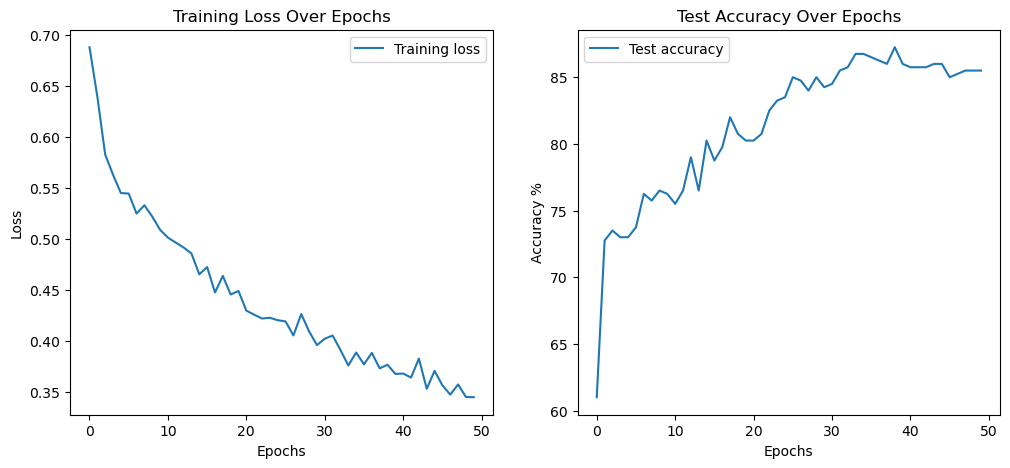

In [37]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()